In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [4]:
data = pd.read_csv('/content/sample_data/train.csv')

In [5]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
x = data.drop(columns=['NObeyesdad','id'],axis=1)
y = data['NObeyesdad']

np.random.seed(42)

x_ , x_test ,y_, y_test = train_test_split(x,y ,stratify=y,test_size=0.15)
x_train, x_valid , y_train , y_valid = train_test_split(x_,y_,test_size=0.15/0.85)

In [7]:
x_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
3969,Male,30.304203,1.75000,120.021161,yes,yes,2.649406,3.0,Sometimes,no,1.042989,no,1.076729,1.0,Sometimes,Automobile
5624,Male,31.000000,1.74000,71.000000,yes,yes,3.000000,3.0,Sometimes,no,2.000000,yes,3.000000,1.0,Sometimes,Bike
3107,Male,18.000000,1.70000,70.000000,yes,yes,3.000000,3.0,Frequently,no,2.000000,no,2.000000,1.0,Sometimes,Public_Transportation
20386,Male,30.493946,1.68395,83.016968,yes,yes,2.766036,3.0,Sometimes,no,2.000000,no,0.966973,0.0,no,Automobile
113,Female,18.000000,1.65000,51.000000,yes,yes,3.000000,3.0,Sometimes,no,2.000000,no,1.000000,1.0,Sometimes,Public_Transportation


In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14530 entries, 3969 to 10741
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          14530 non-null  object 
 1   Age                             14530 non-null  float64
 2   Height                          14530 non-null  float64
 3   Weight                          14530 non-null  float64
 4   family_history_with_overweight  14530 non-null  object 
 5   FAVC                            14530 non-null  object 
 6   FCVC                            14530 non-null  float64
 7   NCP                             14530 non-null  float64
 8   CAEC                            14530 non-null  object 
 9   SMOKE                           14530 non-null  object 
 10  CH2O                            14530 non-null  float64
 11  SCC                             14530 non-null  object 
 12  FAF                             14

In [9]:
x_train.isnull().sum() , y_train.isnull().sum()

(Gender                            0
 Age                               0
 Height                            0
 Weight                            0
 family_history_with_overweight    0
 FAVC                              0
 FCVC                              0
 NCP                               0
 CAEC                              0
 SMOKE                             0
 CH2O                              0
 SCC                               0
 FAF                               0
 TUE                               0
 CALC                              0
 MTRANS                            0
 dtype: int64,
 0)

In [10]:
x_train.duplicated().sum()

0

In [11]:
x_train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000,14530.000000
mean,23.869497,1.700118,87.909873,2.446118,2.758256,2.027916,0.977201,0.614676
std,5.672240,0.087564,26.330384,0.531395,0.706138,0.608052,0.836917,0.600520
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.796257,0.007050,0.000000
50%,22.829717,1.700000,84.451423,2.392179,3.000000,2.000000,1.000000,0.566353
75%,26.000000,1.762921,111.600553,3.000000,3.000000,2.535629,1.583832,1.000000
max,55.493687,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
x_train.describe(include="object").T.style.background_gradient(cmap='Blues')

,count,unique,top,freq
Gender,14530,2,Female,7306
family_history_with_overweight,14530,2,yes,11942
FAVC,14530,2,yes,13296
CAEC,14530,4,Sometimes,12277
SMOKE,14530,2,no,14365
SCC,14530,2,no,14054
CALC,14530,3,Sometimes,10569
MTRANS,14530,5,Public_Transportation,11643


<Axes: >

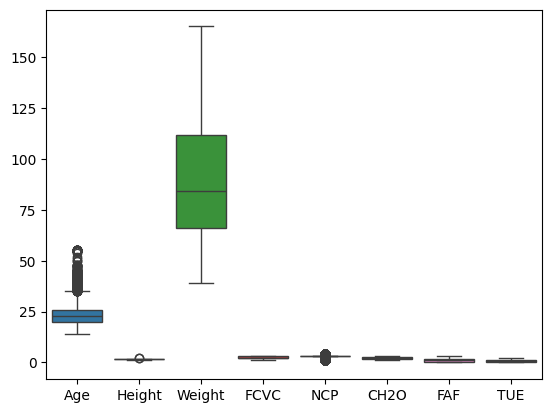

In [13]:
sns.boxplot(data=x_train)

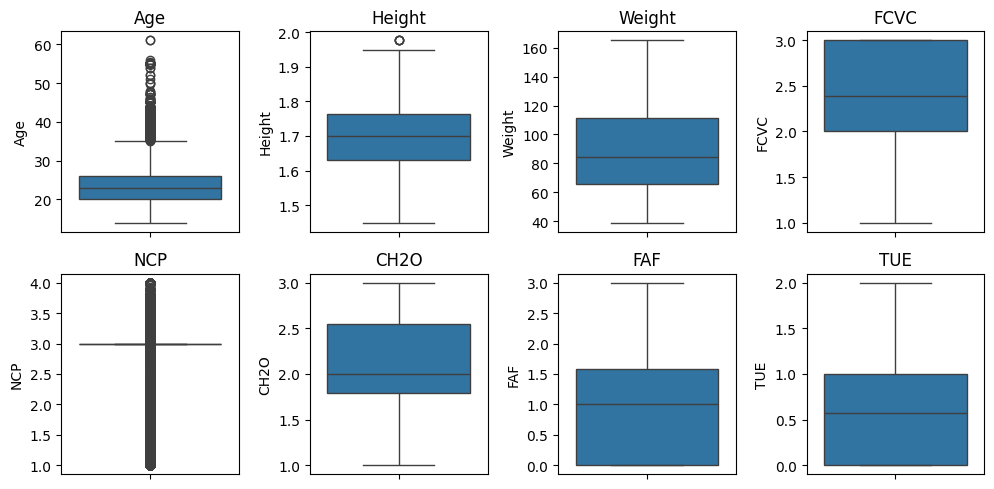

In [14]:
num = x.select_dtypes('number')

fig, axes = plt.subplots(2, 4, figsize=(10, 5))

# Flatten the axes array for easy iteration, and avoid making nested loop.
axes = axes.flatten()

# Plot boxplots for each feature
for i, column in enumerate(num.columns):
    sns.boxplot(num[column], ax = axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show();

In [15]:
x_train['NCP'].unique()

array([3.      , 1.134042, 3.471536, 2.326233, 1.      , 2.395785,
       1.496776, 1.355354, 4.      , 2.956422, 2.669766, 1.894384,
       2.581015, 2.9796  , 1.411685, 2.463113, 2.475228, 2.036794,
       2.141839, 2.973476, 2.983297, 2.845307, 1.672706, 3.884861,
       2.372339, 1.104642, 2.977909, 2.625942, 1.068196, 2.696051,
       3.715118, 2.993623, 2.029858, 2.358298, 2.989791, 1.134321,
       1.458507, 2.812283, 3.985442, 2.937607, 1.193589, 2.473911,
       2.954446, 1.07976 , 2.043359, 2.996834, 3.245148, 1.171027,
       1.288716, 1.194815, 2.083831, 2.608416, 3.03779 , 1.882158,
       1.773916, 3.762778, 2.884848, 1.355752, 2.967089, 3.371832,
       3.047959, 1.667596, 2.119682, 2.475444, 3.576103, 2.711238,
       2.122545, 2.996543, 1.273128, 1.818026, 1.717608, 2.977999,
       2.911568, 2.87747 , 2.13229 , 1.317884, 2.      , 2.271734,
       2.270546, 1.131695, 1.154318, 2.644692, 2.270163, 2.806566,
       3.45259 , 3.087544, 3.715148, 2.832018, 2.677693, 1.009

In [16]:
x_train['NCP'].dtype

dtype('float64')

In [17]:
x_train['NCP']=np.round(x_train['NCP'])

In [18]:
x_train['NCP'].unique()

array([3., 1., 2., 4.])

In [19]:
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (num < lower_bound) | (num > upper_bound)

outlier_counts = outliers_mask.sum(axis=0)

total_rows = num.shape[0]
outlier_percentage = (outlier_counts / total_rows) * 100

outliers_summary = pd.DataFrame({
    "Number of Outliers": outlier_counts,
    "Outlier Percentage": outlier_percentage
})

outliers_summary.style.background_gradient(cmap='hot')

,Number of Outliers,Outlier Percentage
Age,1074,5.173909
Height,4,0.019270
Weight,0,0.000000
FCVC,0,0.000000
NCP,6052,29.155025
CH2O,0,0.000000
FAF,0,0.000000
TUE,0,0.000000


In [20]:
IQR

,0
Age,6.000000
Height,0.131031
Weight,45.600553
FCVC,1.000000
NCP,0.000000
CH2O,0.757595
FAF,1.579393
TUE,1.000000


In [21]:
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers_mask = (num < lower_bound) | (num > upper_bound)

outlier_counts = outliers_mask.sum(axis=0)

total_rows = num.shape[0]
outlier_percentage = (outlier_counts / total_rows) * 100

outliers_summary = pd.DataFrame({
    "Number of Outliers": outlier_counts,
    "Outlier Percentage": outlier_percentage
})

outliers_summary.style.background_gradient(cmap='hot')

,Number of Outliers,Outlier Percentage
Age,109,0.525099
Height,0,0.000000
Weight,0,0.000000
FCVC,0,0.000000
NCP,6052,29.155025
CH2O,0,0.000000
FAF,0,0.000000
TUE,0,0.000000


In [22]:
x_train['Age'].describe()

,Age
count,14530.000000
mean,23.869497
std,5.672240
min,14.000000
25%,20.000000
50%,22.829717
75%,26.000000
max,55.493687


In [23]:
x_train['NCP'].describe()

,NCP
count,14530.000000
mean,2.761184
std,0.723313
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,4.000000


In [24]:
x_train[x_train['NCP']==4]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
10753,Female,18.000000,1.650000,56.000000,yes,yes,3.000000,4.0,Frequently,no,1.000000,no,1.000000,2.000000,no,Public_Transportation
8089,Male,18.000000,1.848553,59.990861,yes,yes,3.000000,4.0,Sometimes,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile
15743,Female,18.634286,1.731960,69.389900,yes,no,3.000000,4.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13719,Female,16.306870,1.716691,50.000000,no,yes,2.206119,4.0,Frequently,no,1.394883,no,0.935217,0.868788,Sometimes,Public_Transportation
16676,Male,17.000000,1.700000,50.000000,yes,yes,2.000000,4.0,Frequently,no,2.000000,no,2.000000,1.000000,no,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,Male,18.000000,1.701566,86.080500,no,yes,2.000000,4.0,Sometimes,no,2.269564,yes,2.000000,0.000000,Sometimes,Walking
16856,Female,20.000000,1.600000,60.000000,yes,yes,3.000000,4.0,Frequently,no,3.000000,no,0.000000,1.000000,no,Public_Transportation
7316,Male,18.000000,1.700000,55.000000,yes,yes,3.000000,4.0,Sometimes,no,2.000000,no,2.000000,0.000000,no,Automobile
2298,Male,17.039058,1.806710,59.243506,yes,yes,3.000000,4.0,Sometimes,no,2.651258,no,2.697949,1.000000,no,Automobile


In [25]:
x_train[x_train['NCP']==1]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
899,Female,20.406871,1.694265,80.000000,yes,yes,2.392665,1.0,Sometimes,no,2.000000,no,1.000000,1.343044,no,Public_Transportation
13021,Female,22.018228,1.605662,82.000000,yes,yes,2.000000,1.0,Sometimes,no,2.000000,no,0.948930,0.000000,Sometimes,Public_Transportation
13191,Female,19.833682,1.650000,88.675503,yes,yes,2.784464,1.0,Sometimes,no,3.000000,no,1.350001,1.000000,Sometimes,Public_Transportation
16926,Male,24.449655,1.647971,100.642257,yes,yes,2.724285,1.0,Sometimes,no,1.000000,no,0.641954,1.690102,no,Public_Transportation
9543,Female,28.830558,1.700000,78.000000,yes,yes,2.000000,1.0,Sometimes,no,1.846754,no,1.727114,0.000000,Sometimes,Automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10921,Male,19.000000,1.620000,69.000000,no,yes,2.000000,1.0,Sometimes,no,1.000000,no,1.000000,1.000000,Sometimes,Public_Transportation
19894,Male,31.000000,1.740000,74.000000,yes,no,2.000000,1.0,Always,yes,2.000000,no,1.000000,1.000000,Sometimes,Bike
3642,Female,18.000000,1.600000,83.000000,yes,yes,2.000000,1.0,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
18248,Male,33.000000,1.850000,97.000000,yes,yes,2.000000,1.0,Sometimes,no,1.000000,no,1.000000,0.000000,no,Walking


In [26]:
x_train['NCP'].value_counts()

,count
NCP,
3.0,11395
1.0,1765
4.0,715
2.0,655


due to that there are 11395 belongs to 3 it looks every thing ather is outlier

<Axes: xlabel='NCP', ylabel='count'>

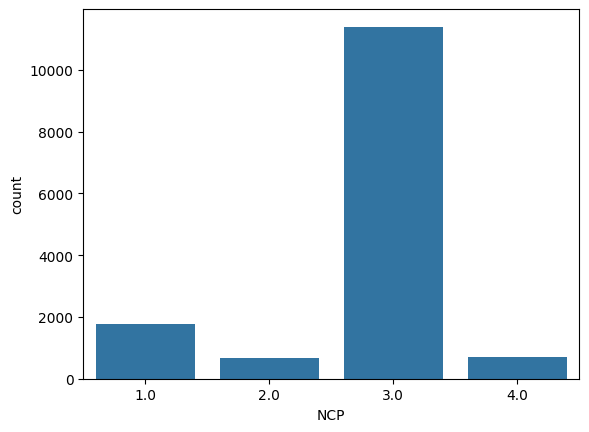

In [27]:
sns.countplot(x=x_train['NCP'])

<Axes: xlabel='NCP', ylabel='Count'>

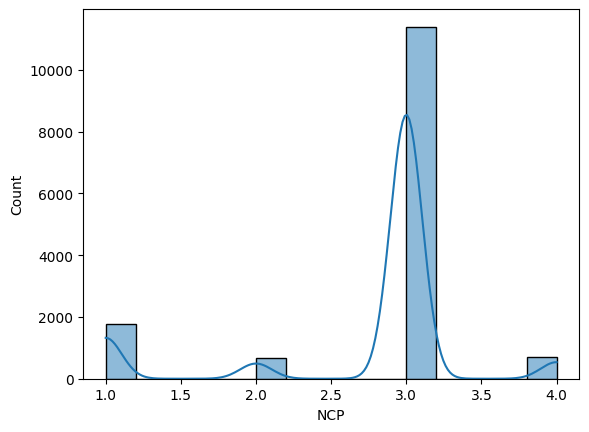

In [28]:
sns.histplot(x=x_train['NCP'],kde=True)

In [29]:
x_train.shape

(14530, 16)

In [30]:
x_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
3969,Male,30.304203,1.750000,120.021161,yes,yes,2.649406,3.0,Sometimes,no,1.042989,no,1.076729,1.000000,Sometimes,Automobile
5624,Male,31.000000,1.740000,71.000000,yes,yes,3.000000,3.0,Sometimes,no,2.000000,yes,3.000000,1.000000,Sometimes,Bike
3107,Male,18.000000,1.700000,70.000000,yes,yes,3.000000,3.0,Frequently,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
20386,Male,30.493946,1.683950,83.016968,yes,yes,2.766036,3.0,Sometimes,no,2.000000,no,0.966973,0.000000,no,Automobile
113,Female,18.000000,1.650000,51.000000,yes,yes,3.000000,3.0,Sometimes,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15087,Female,25.498965,1.641098,104.846817,yes,yes,3.000000,3.0,Sometimes,no,1.610472,no,0.259427,0.852362,Sometimes,Public_Transportation
1508,Male,21.000000,1.710000,75.000000,no,yes,2.000000,3.0,Sometimes,no,3.000000,no,1.000000,1.000000,Sometimes,Public_Transportation
1492,Female,16.000000,1.650000,45.000000,yes,yes,3.000000,3.0,Always,no,3.000000,yes,1.000000,0.000000,no,Public_Transportation
6397,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,no,Public_Transportation


In [31]:
# num = x.select_dtypes('number')
# for col in num:


In [32]:
### split the data
### there are no nulls
### data consistance
### check duplicate and outliers ,skewness
### feature engineering bmi and drop weight and height columns
###

check skewess

In [34]:
skewness = num.skew()
print(skewness)

Age       1.586252
Height    0.015803
Weight    0.093187
FCVC     -0.356611
NCP      -1.562253
CH2O     -0.212506
FAF       0.505726
TUE       0.670411
dtype: float64


In [36]:
num['NCP'] = x_train['NCP']

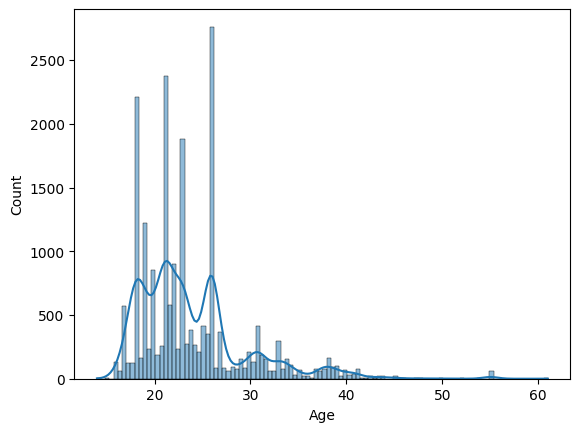

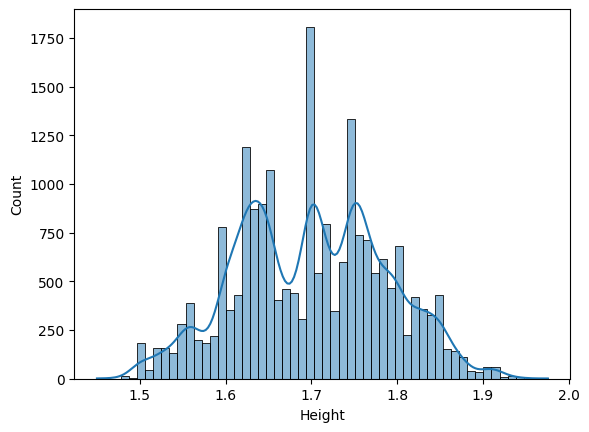

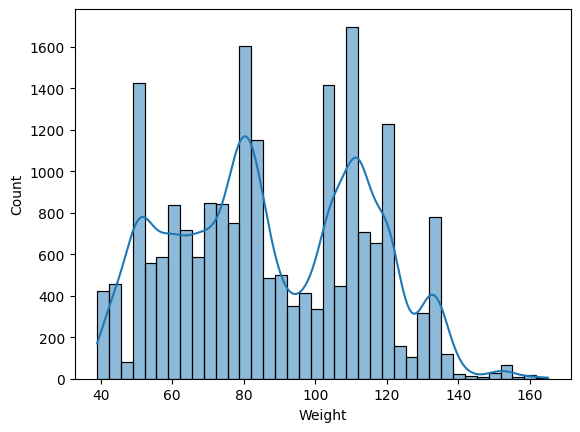

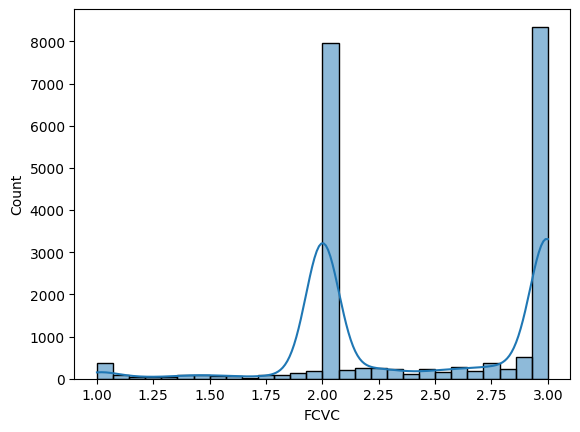

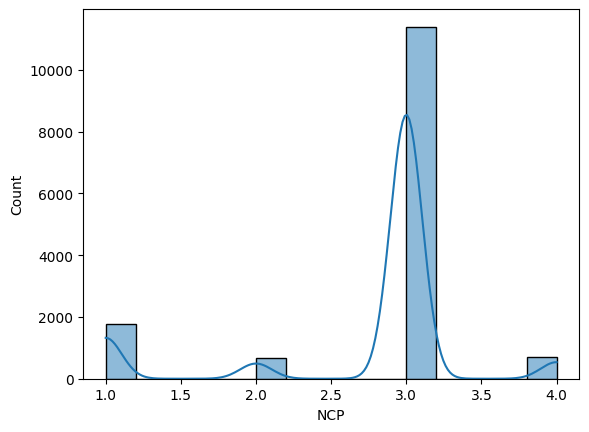

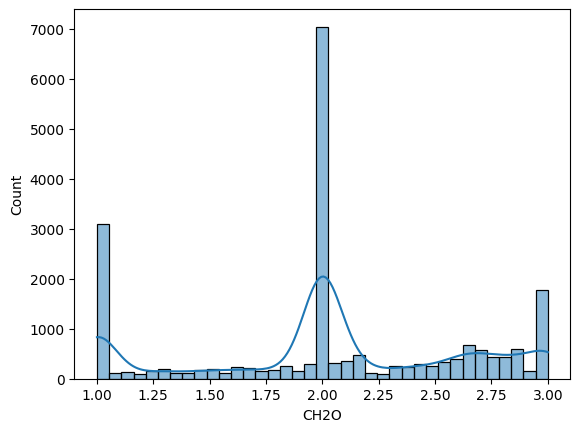

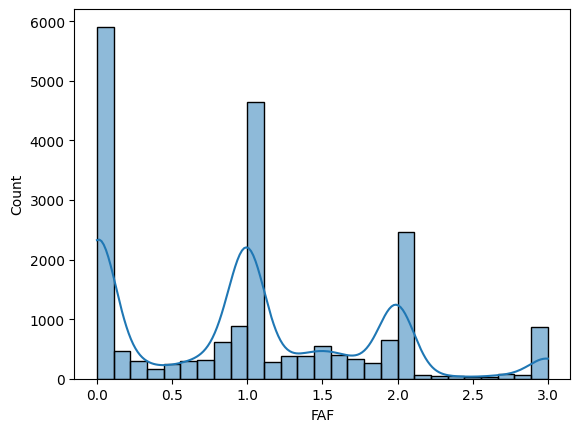

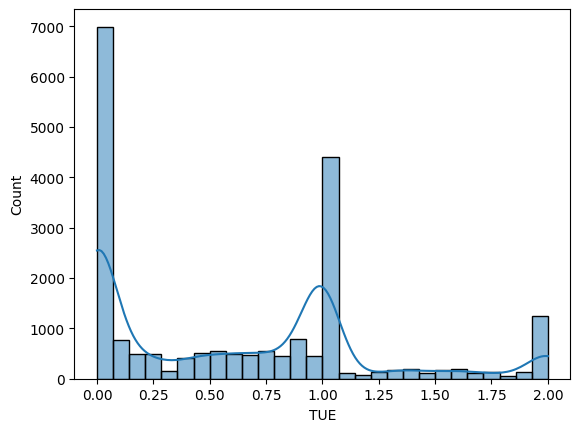

In [37]:
for i in num.columns:
  sns.histplot(x=num[i],kde=True)
  plt.show()


العمر حوالين ال 20 اكثر حاجه انه اكثر ناس بتقيس وزنهم وتهتم بيه
الطول تابع النورمال
الوزن مالتي مود وده طبيعي بالنسبه اطوال الناس

In [65]:
categrical = x_train.select_dtypes('object')

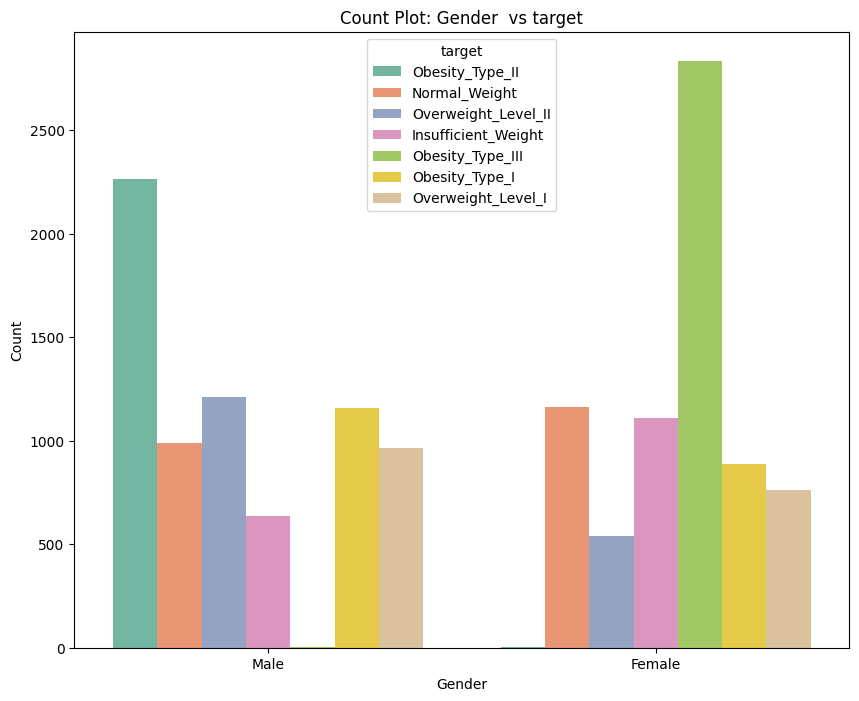

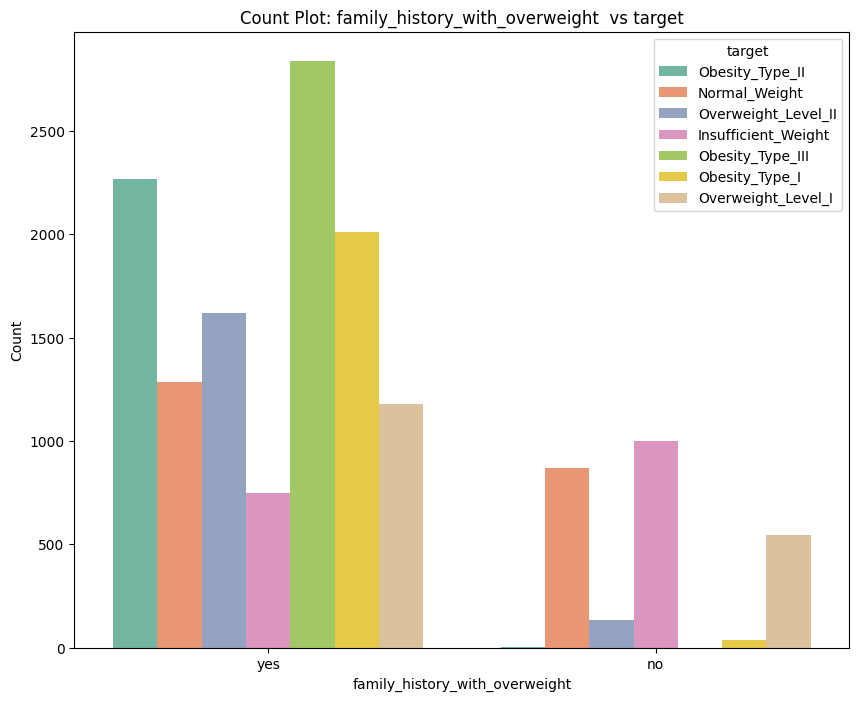

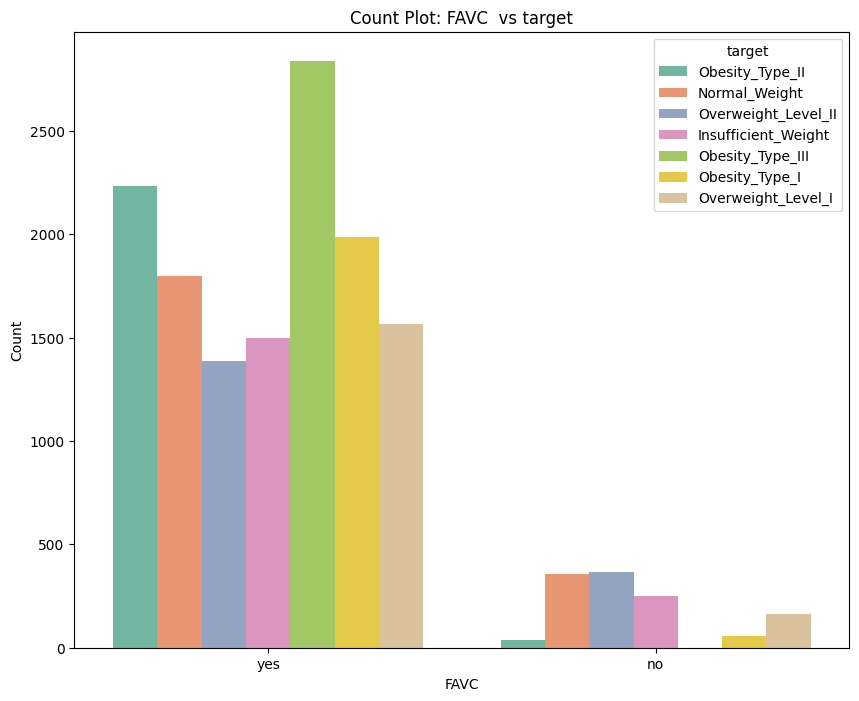

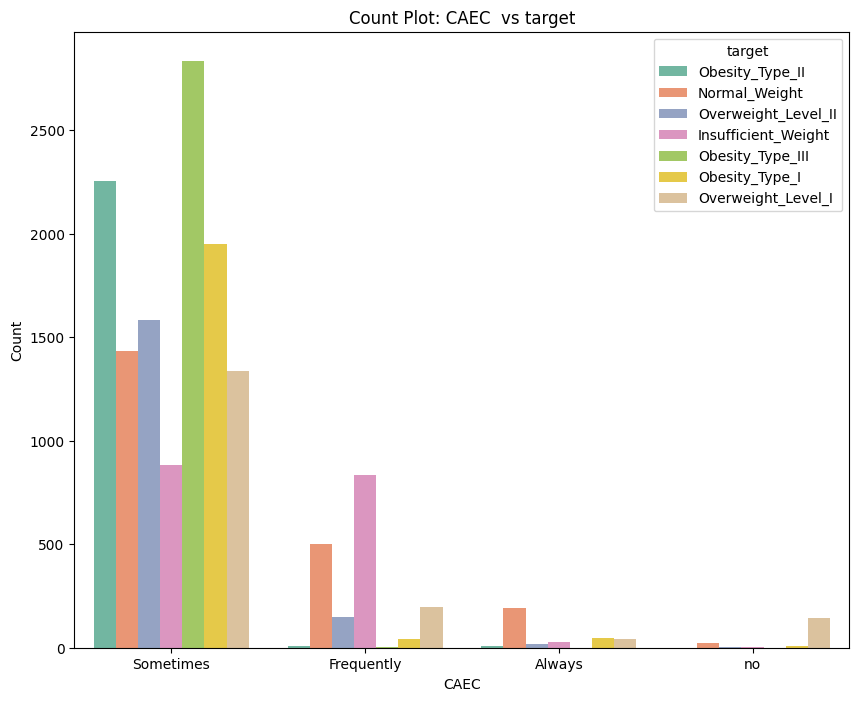

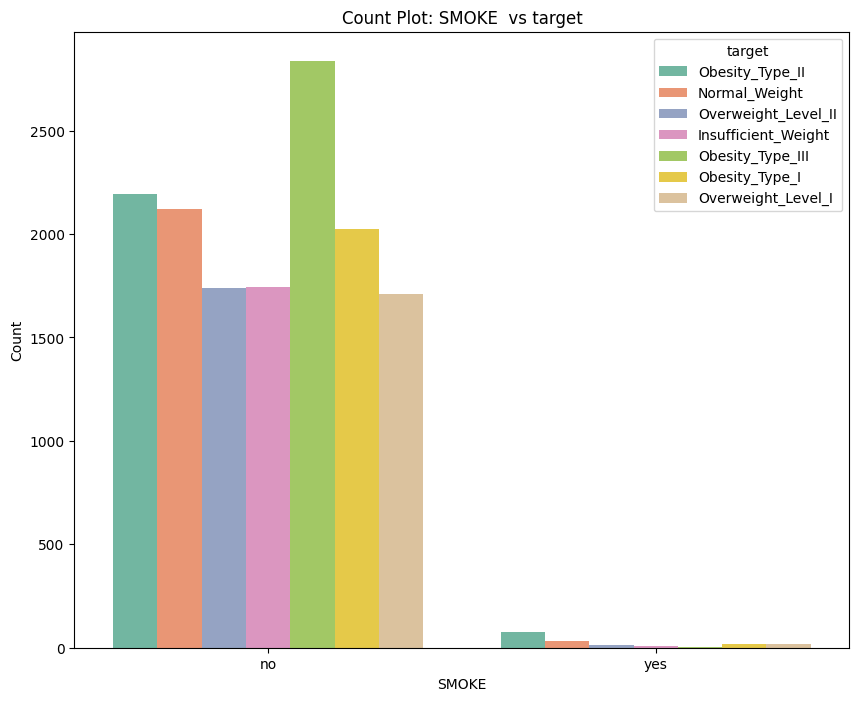

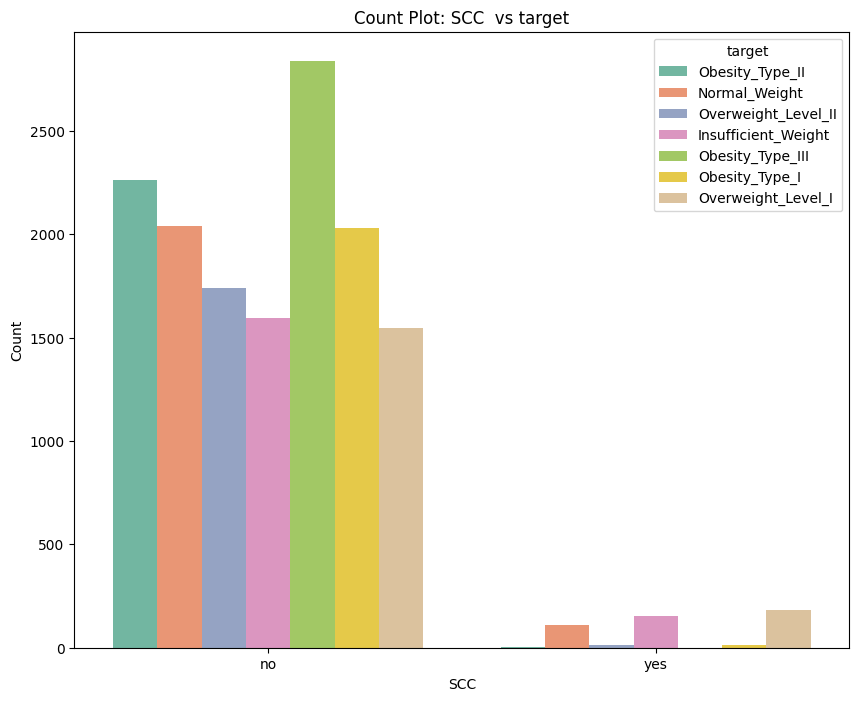

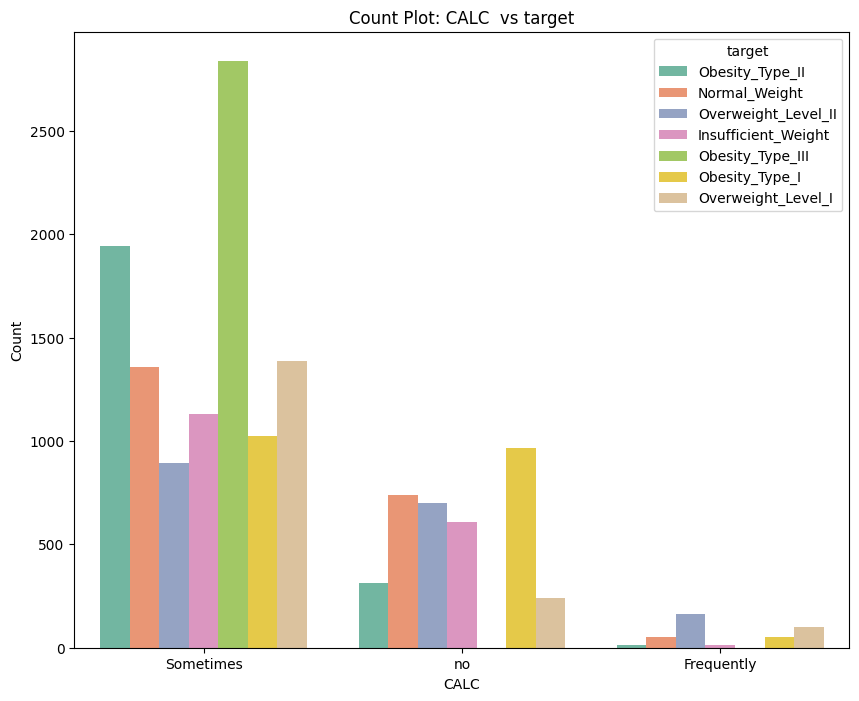

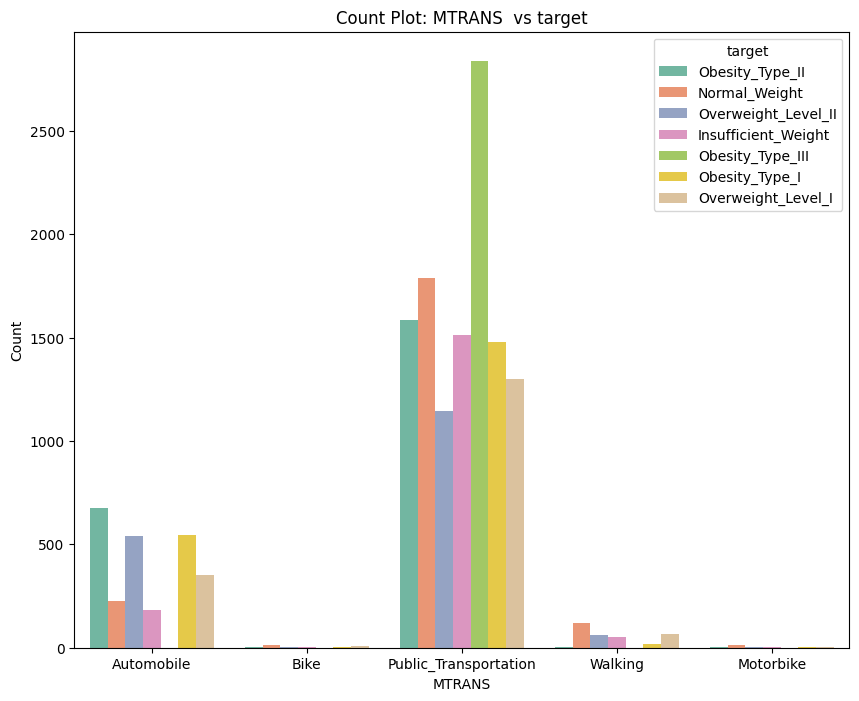

In [69]:
for i in categrical.columns:
  plt.figure(figsize=(10, 8))
  sns.countplot(x=x_train[i], hue= y_train, palette='Set2')
  plt.title(f'Count Plot: {i}  vs target')
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.legend(title='target')
  plt.show();

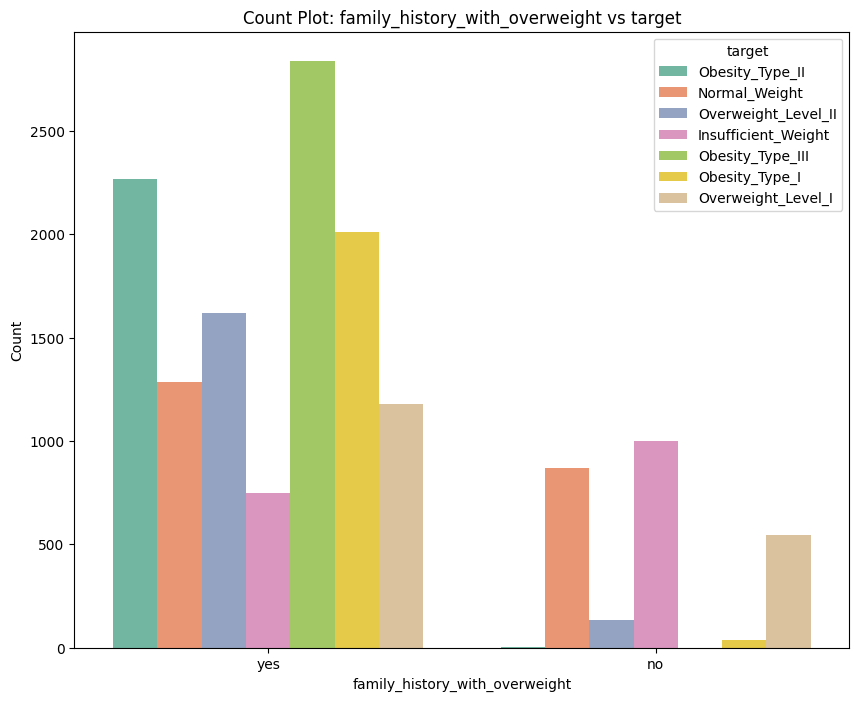

In [59]:
plt.figure(figsize=(10, 8))
sns.countplot(x=x_train['family_history_with_overweight'], hue= y_train, palette='Set2')
plt.title('Count Plot: family_history_with_overweight vs target')
plt.xlabel('family_history_with_overweight')
plt.ylabel('Count')
plt.legend(title='target')
plt.show();

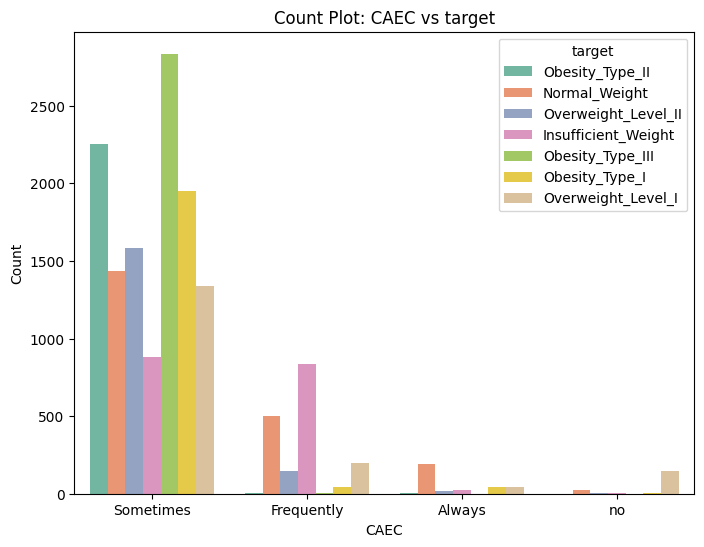

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(x=x_train['CAEC'], hue= y_train, palette='Set2')
plt.title('Count Plot: CAEC vs target')
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.legend(title='target')
plt.show();

In [64]:
y_train.value_counts()

,count
NObeyesdad,
Obesity_Type_III,2838
Obesity_Type_II,2268
Normal_Weight,2152
Obesity_Type_I,2043
Overweight_Level_II,1753
Insufficient_Weight,1749
Overweight_Level_I,1727


<ipython-input-45-bc5a41897934>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y_train, y=num['Weight'], palette='Set2')


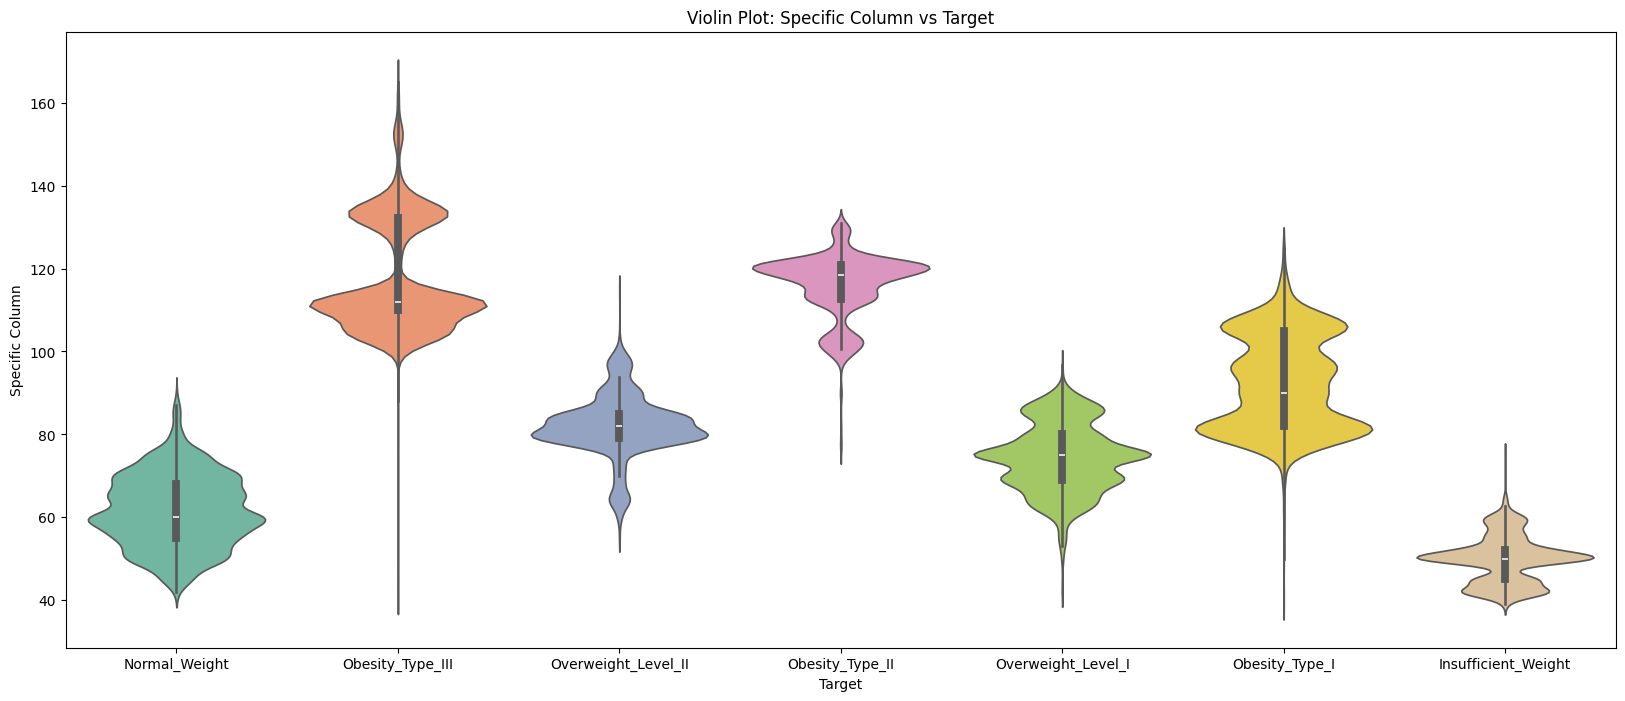

In [45]:
plt.figure(figsize=(20, 8))
sns.violinplot(x=y_train, y=num['Weight'], palette='Set2')
plt.title('Violin Plot: Specific Column vs Target')
plt.xlabel('Target')
plt.ylabel('Specific Column')
plt.show()

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

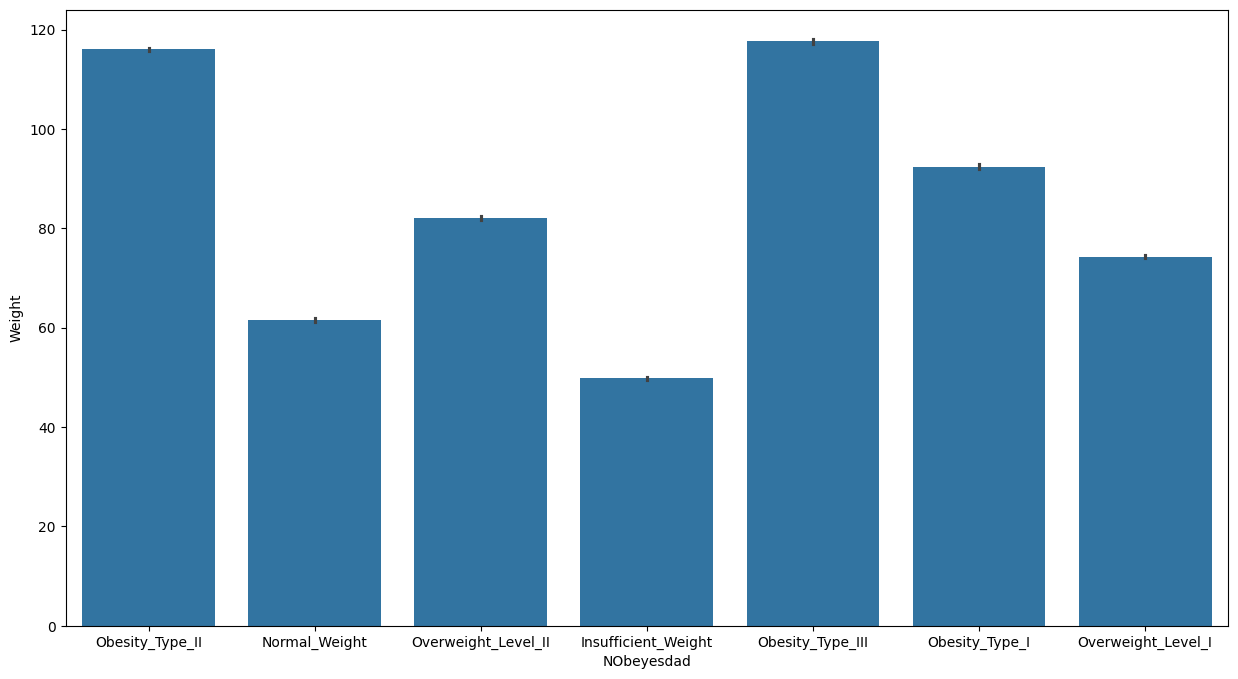

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(x=y_train,y=x_train['Weight'])

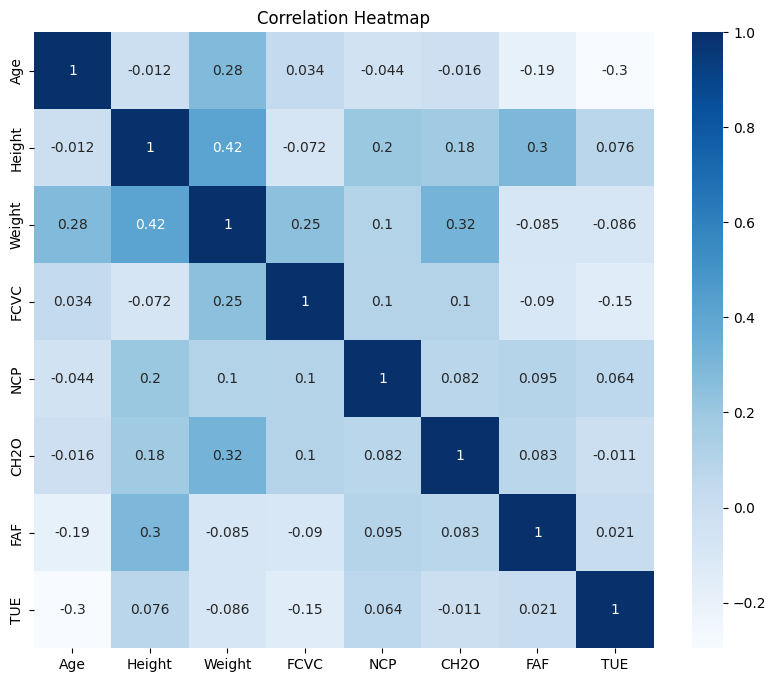

In [49]:
correlation = num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show();

# no storng correlation between columns

In [50]:
for df in [x_train]:
    x_train['BMI'] = x_train['Weight']/x_train['Height']**2

In [52]:
x_train.drop(columns=['Weight','Height'],inplace=True)

In [54]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14530 entries, 3969 to 10741
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          14530 non-null  object 
 1   Age                             14530 non-null  float64
 2   family_history_with_overweight  14530 non-null  object 
 3   FAVC                            14530 non-null  object 
 4   FCVC                            14530 non-null  float64
 5   NCP                             14530 non-null  float64
 6   CAEC                            14530 non-null  object 
 7   SMOKE                           14530 non-null  object 
 8   CH2O                            14530 non-null  float64
 9   SCC                             14530 non-null  object 
 10  FAF                             14530 non-null  float64
 11  TUE                             14530 non-null  float64
 12  CALC                            14

In [ ]:
category = [['no','Sometimes','Frequently','Always']]
encoder_CAEC = OrdinalEncoder(categories=category)
x_train['CAEC'] = encoder_CAEC.fit_transform(x_train['CAEC'])

In [ ]:
category =[['no','yes']]
encoder_history = OrdinalEncoder(categories=category)
x_train['family_history_with_overweight'] = encoder_history.fit_transform(x_train['family_history_with_overweight'])

In [55]:
x_train['MTRANS'].unique()

array(['Automobile', 'Bike', 'Public_Transportation', 'Walking',
       'Motorbike'], dtype=object)

In [ ]:
category =[['Walking' ,'Bike','']]
x_train['MTRANS']=encoder_history.fit_transform(x_train['MTRANS'])

In [ ]:
def data_preprocessing(data):
  data['BMI'] = data['Weight']/data['Height']**2
  data.drop(columns=['Weight','Height'],inplace=True)
  data['NCP'] = np.round(data['NCP'])
  return data
